In [1]:
# import modules
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import shap
from explainerdashboard import ClassifierExplainer, ExplainerDashboard


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


In [2]:
# set paths
DATAPATH = "./data"
DATAPROCESSEDPATH = "./data_preprocessed"
MODELPATH = "./models"

In [3]:
# load training dataset
with open(DATAPROCESSEDPATH + '/df_train.pkl','rb') as f:
    df_train = joblib.load(f)
with open(DATAPROCESSEDPATH + '/X_train.pkl','rb') as f:
    X_train = joblib.load(f)
with open(DATAPROCESSEDPATH + '/y_train.pkl','rb') as f:
    y_train = joblib.load(f)    

# load testing dataset
with open(DATAPROCESSEDPATH + '/df_test.pkl','rb') as f:
    df_test = joblib.load(f)
with open(DATAPROCESSEDPATH + '/X_test.pkl','rb') as f:
    X_test = joblib.load(f)
with open(DATAPROCESSEDPATH + '/y_test.pkl','rb') as f:
    y_test = joblib.load(f) 

# load trained model
with open(MODELPATH + '/model.pkl','rb') as f:
    model = joblib.load(f)

In [4]:
# show which model is used
print(model)

LGBMClassifier()


In [5]:
# init Tree explainer and get SHAP values
explainer = shap.TreeExplainer(model, 
                               X_test, 
                               model_output='probability',
                               feature_names=X_test.columns)

In [6]:
# calculate shap values
shap_values = explainer(X_test.sample(1000), check_additivity=True)

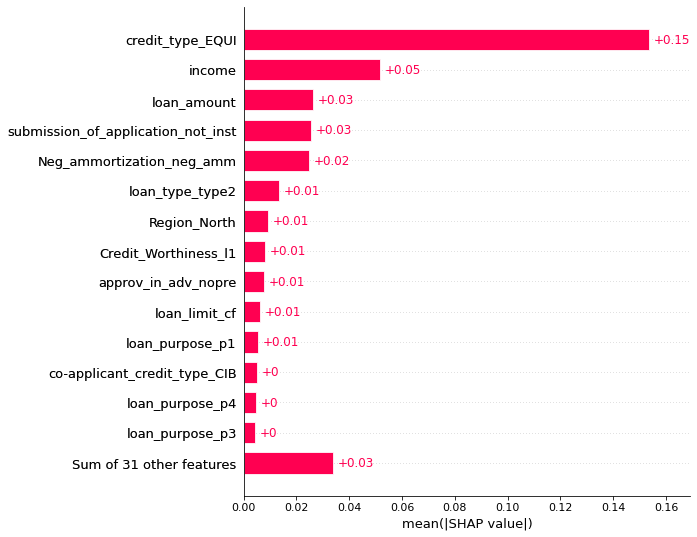

In [7]:
# explain test data
shap.plots.bar(shap_values, max_display=15)

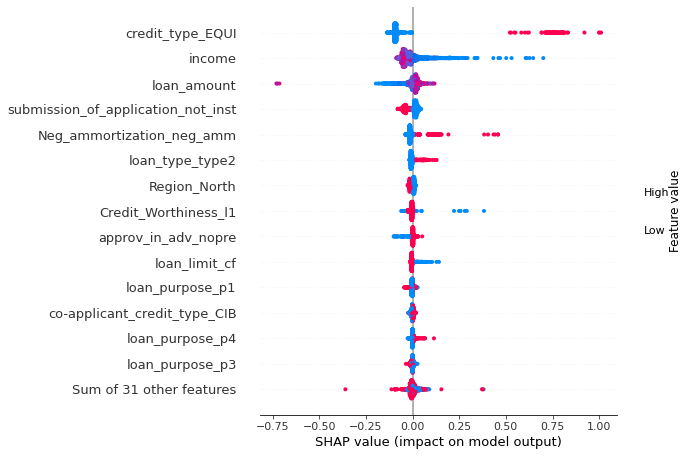

In [8]:
shap.plots.beeswarm(shap_values, max_display=15)